In [1]:
import pandas as pd
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [2]:
def read_csv() -> DataFrame:
    return pd.read_csv('chicago_taxi_trips_2016_12.csv',
                       parse_dates=True,
                       infer_datetime_format=True)

In [3]:
def get_mode_stats(df) -> list:
    res = []
    for index, column in enumerate(df):
        frequencies = df[column].value_counts()
        res.append(
            {
                'col': column,
                'first_mode': frequencies.index[0],
                'fm_freq': frequencies[0],
                'fm_perc': (frequencies[0] / len(df)) * 100,
                'second_mode': frequencies.index[1],
                'sm_freq': frequencies[1],
                'sm_perc': (frequencies[1] / len(df)) * 100
            })
    return res

In [4]:
def get_stats(df, numeric = True):
    stats = pd.DataFrame(df.describe(include='all'))
    if (numeric):
        return {
            'val_num': len(df),
            'missing_values_perc': 100-(stats.loc['count']/len(df))*100,
            'cardinality': df.nunique(),
            'min_val': stats.loc['min'],
            'max_val': stats.loc['max'],
            'first_quartile': stats.loc['25%'],
            'third_quartile': stats.loc['75%'],
            'average': stats.loc['mean'],
            'median': stats.loc['50%'],
            'st_dev': stats.loc['std']
            }
    else:
        return {
            'val_num': len(df),
            'missing_values_perc': 100-(stats.loc['count']/len(df))*100,
            'cardinality': df.nunique(),
            'modes': get_mode_stats(df)
            }
        

In [5]:
def print_plots(data, numeric = True):
    tot = 'Total values: {tot}'
    display(Markdown(tot.format(tot=data['val_num'])))
    data['missing_values_perc'].plot(kind='barh', title='Percentage of missing values')
    plt.show()
    data['cardinality'].plot(kind='barh', title='Cardinality')
    plt.show()
    if (numeric):        
        data['min_val'].plot(kind='barh', title='Minimum values')
        plt.show()
        data['max_val'].plot(kind='barh', title='Maximum values')
        plt.show()
        data['first_quartile'].plot(kind='barh', title='First quartile')
        plt.show()
        data['third_quartile'].plot(kind='barh', title='Third quartile')
        plt.show()
        data['average'].plot(kind='barh', title='Mean')
        plt.show()
        data['median'].plot(kind='barh', title='Median')
        plt.show()
        data['st_dev'].plot(kind='barh', title='Standard deviation')
        plt.show()
    else:
        for index, column in enumerate(data['modes']):
            column = '### Column: {c}'
            display(Markdown(column.format(c=data['modes'][index]['col'])))

            first_mode='#### First mode: {fm}'
            display(Markdown(first_mode.format(fm=data['modes'][index]['first_mode'])))
            fm_freq='Frequency of first mode: {fmf}'
            display(Markdown(fm_freq.format(fmf=data['modes'][index]['fm_freq'])))
            fm_perc='Percentage of first mode: {fmp}'
            display(Markdown(fm_perc.format(fmp=data['modes'][index]['fm_perc'])))
            second_mode='#### Second mode: {sm}'
            display(Markdown(second_mode.format(sm=data['modes'][index]['second_mode'])))
            sm_freq='Frequency of second mode: {smf}'
            display(Markdown(sm_freq.format(smf=data['modes'][index]['sm_freq'])))
            fm_perc='Percentage of second mode: {smp}'
            display(Markdown(fm_perc.format(smp=data['modes'][index]['sm_perc'])))

In [6]:
def main() -> None:
    df: DataFrame = read_csv()

    numerics_df: DataFrame = df.select_dtypes(include='number')
    categoricals_df: DataFrame = df.select_dtypes(exclude='number')

    numerics = get_stats(numerics_df)
    categoricals = get_stats(categoricals_df, False)
    
    print(numerics)
    print(categoricals)

    display(Markdown('# Continuous values histograms'))
    print_plots(numerics)
    display(Markdown('# Categorical values histograms'))
    print_plots(categoricals, False)
    
    display(Markdown('# Data quality problems'))
    display(Markdown('1. The entire "pickup_census_tract" column has no values'))
    display(Markdown('2. A little less than half of values in "company" and "dropoff_census_tract" columns are missing'))
    display(Markdown('3. There are also other values missing in other columns'))

{'val_num': 1245712, 'missing_values_perc': taxi_id                     0.049610
trip_seconds                0.007867
trip_miles                  0.001766
pickup_census_tract       100.000000
dropoff_census_tract       36.803852
pickup_community_area       9.179570
dropoff_community_area     10.741728
fare                        0.001846
tips                        0.001846
tolls                       0.001846
extras                      0.001846
trip_total                  0.001846
company                    46.110738
pickup_latitude             9.179008
pickup_longitude            9.179008
dropoff_latitude           10.633437
dropoff_longitude          10.633437
Name: count, dtype: float64, 'cardinality': taxi_id                   4550
trip_seconds              3855
trip_miles                2868
pickup_census_tract          0
dropoff_census_tract       421
pickup_community_area       77
dropoff_community_area      77
fare                      1247
tips                      1516
toll

# Continuous values histograms

Total values: 1245712

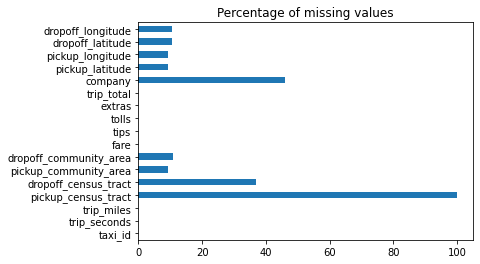

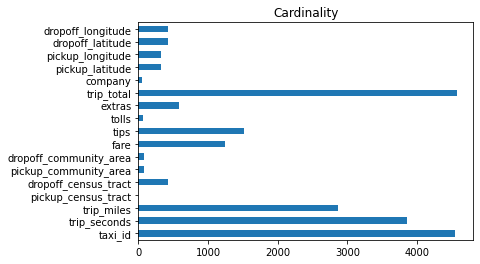

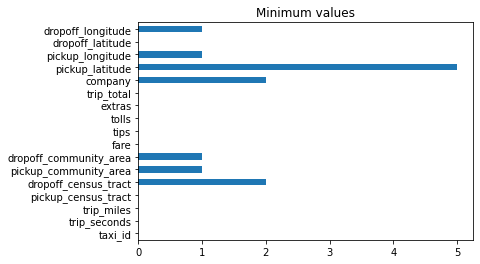

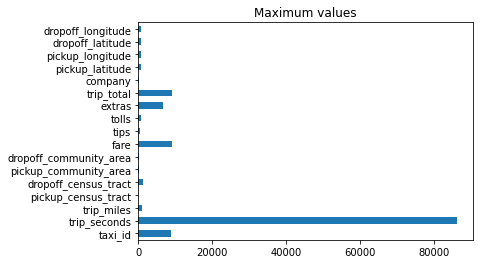

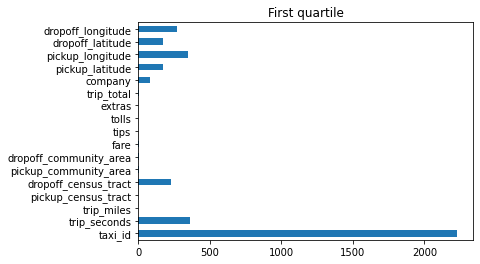

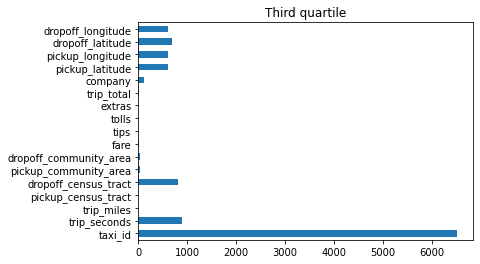

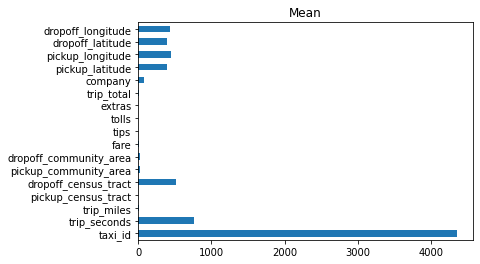

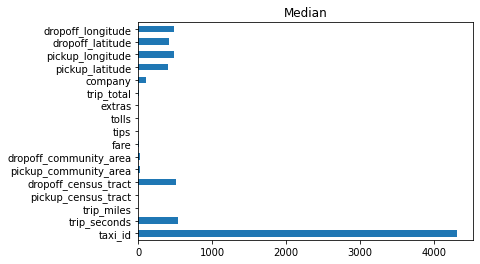

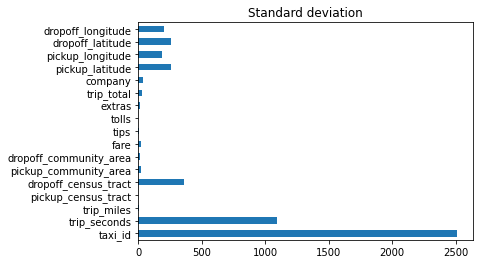

# Categorical values histograms

Total values: 1245712

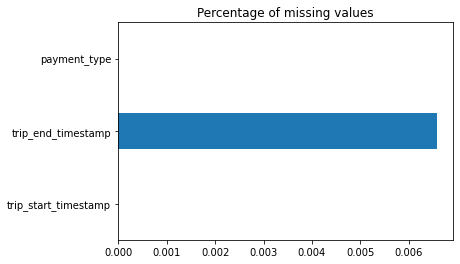

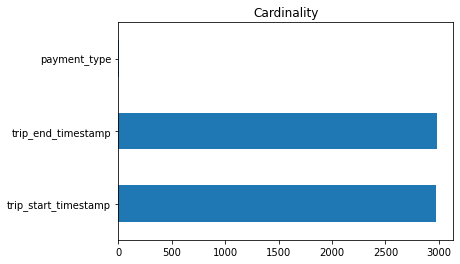

### Column: trip_start_timestamp

#### First mode: 2016-12-16 19:00:00

Frequency of first mode: 1201

Percentage of first mode: 0.09641072735913277

#### Second mode: 2016-12-9 18:45:00

Frequency of second mode: 1181

Percentage of second mode: 0.09480521982609141

### Column: trip_end_timestamp

#### First mode: 2016-12-9 19:15:00

Frequency of first mode: 1224

Percentage of first mode: 0.0982570610221303

#### Second mode: 2016-12-16 19:00:00

Frequency of second mode: 1200

Percentage of second mode: 0.0963304519824807

### Column: payment_type

#### First mode: Cash

Frequency of first mode: 711456

Percentage of first mode: 57.11239837137316

#### Second mode: Credit Card

Frequency of second mode: 523462

Percentage of second mode: 42.021109213044426

# Data quality problems

1. The entire "pickup_census_tract" column has no values

2. A little less than half of values in "company" and "dropoff_census_tract" columns are missing

3. There are also other values missing in other columns

In [7]:
if (__name__ == '__main__'):
    main()